<a href="https://colab.research.google.com/github/DavisonDWilson/IBM-HR-Experimental-Design/blob/main/IBM_HR_Experimental_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Introduction

The IBM HR Analytics Employee Attrition & Performance dataset was created to help determine the factors that contribute to employee attrition at IBM. A sample of employees were surveyed on their age, compensation, gender, and other features including whether or not they left the company. This data was examined to determine the effect of monthly income on the attrition rate. Identifying factors that contribute to attrition would be helpful to any business. The cost of training replacements and the loss of experienced employees can be significant. 


##2. Hypothesis

**H₀:** There is no significant difference between the average monthly income of employees who left and those who stayed.

**Hₐ:** There is a significant difference between the average monthly income of employees who left and those who stayed.


##3. Data

The data comes from [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) and represents data about employees including whether they left the company and 32 potentially predictive features. 1,470 employees are included. There are no missing values. Some of the features are numerical, such as MonthlyIncome, and some are categorical, such as Gender. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math

from google.colab import files
house_data = files.upload()
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.info())
print(df.head())

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int6

In [ ]:
short_df = df[:5]
short_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##4. Methods

First, the dataset was split into employees who left and those who stayed. A histogram of the two datasets was plotted to visually inspect the data. Descriptive statistics were calculated to determine skewness and kurtosis. An independent samples t-test was conducted testing the null hypothesis that there is no difference in the means of the monthly income of the two groups of employees. The 95% two-tail confidence interval was also calculated.

Monthly Income


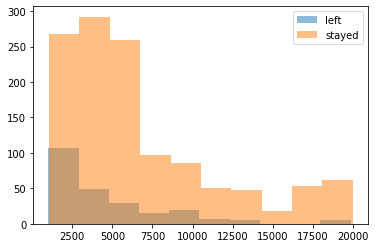

left: DescribeResult(nobs=237, minmax=(1009, 19859), mean=4787.0928270042195, variance=13251131.516770363, skewness=1.908966310070742, kurtosis=4.068929804278029)
stayed: DescribeResult(nobs=1233, minmax=(1051, 19999), mean=6832.739659367397, variance=23215128.338823583, skewness=1.2846660875596987, kurtosis=0.664057751851538)
ttest: Ttest_indResult(statistic=-6.203935765608938, pvalue=7.14736398535381e-10)
The difference in means at the 95% confidence interval (two-tail) is between 1509.809526546714 and 2581.48413817964.


In [ ]:
df_left = df[df['Attrition'] == 'Yes']#employees who left
df_stayed = df[df['Attrition'] == 'No']#employees who didn't leave

#this function compares two samples using a t-test 
#it also plots a histogram and includes descriptive statistics to check for normality
def check_for_diff(df1, df2, column1, column2, label1, label2, title):
  print(title)
  if df1.empty:
    print('df1 empty')
    return
  if df2.empty:
    print('df2 empty')
    return
  plt.hist(df1[column1], alpha= .5, label = label1)
  plt.hist(df2[column2], alpha = .5, label = label2)
  plt.legend()
  plt.show()

  print(label1 + ": " + str(stats.describe(df1[column1])))
  print(label2 + ': ' + str(stats.describe(df2[column2])))
  print('ttest: ' + str(stats.ttest_ind(df1[column1], df2[column2])))

check_for_diff(df_left, df_stayed, 'MonthlyIncome', 'MonthlyIncome', 'left', 'stayed', 'Monthly Income')

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(df_left['MonthlyIncome'], df_stayed['MonthlyIncome']))

The p-value of the t-test is much less than 0.05 and the 95% confidence interval of $1500-$2600 is significant. Those who left had a mean income of \$4,800 and those who stayed had a mean income of \$6,800.
However, the monthly income of employees likely depends on the role that the employee has. To check if this lurking variable has an impact on the results of the company-wide analysis, such as in Simpson's paradox, the datasets were further divided by role. Histograms, descriptive statistics, and t-tests were conducted on these sub-divided datasets.

Sales Executive monthly income


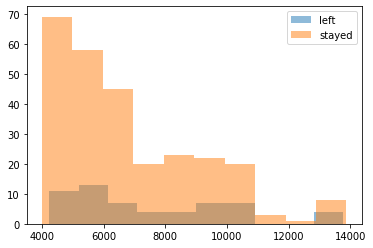

left: DescribeResult(nobs=57, minmax=(4233, 13758), mean=7489.0, variance=6773904.714285715, skewness=0.7408819616704729, kurtosis=-0.3788683542291653)
stayed: DescribeResult(nobs=269, minmax=(4001, 13872), mean=6804.617100371747, variance=5296335.565527382, skewness=0.9743481835399729, kurtosis=0.2929184938217948)
ttest: Ttest_indResult(statistic=1.9920040758145283, pvalue=0.04720960731606244)
Research Scientist monthly income


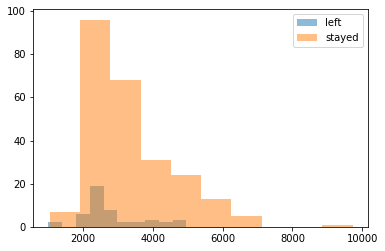

left: DescribeResult(nobs=47, minmax=(1009, 4963), mean=2780.468085106383, variance=795730.6022201665, skewness=0.9504393824249849, kurtosis=0.5285233574920625)
stayed: DescribeResult(nobs=245, minmax=(1051, 9724), mean=3328.122448979592, variance=1513500.7554366007, skewness=1.2850736855951117, kurtosis=2.576469427585846)
ttest: Ttest_indResult(statistic=-2.9069512760523164, pvalue=0.003931308709690858)
Laboratory Technician monthly income


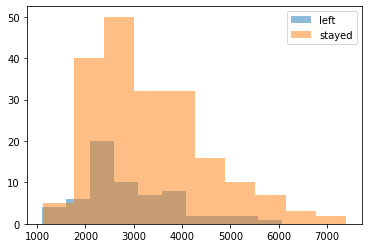

left: DescribeResult(nobs=62, minmax=(1102, 6074), mean=2919.2580645161293, variance=1039988.8831306186, skewness=0.9410623627025071, kurtosis=0.7926335274412284)
stayed: DescribeResult(nobs=197, minmax=(1129, 7403), mean=3337.223350253807, variance=1375895.9600642286, skewness=0.9492557839966976, kurtosis=0.5322890501754309)
ttest: Ttest_indResult(statistic=-2.5210926208529822, pvalue=0.012304838726728736)
Manufacturing Director monthly income


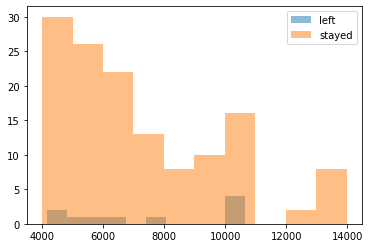

left: DescribeResult(nobs=10, minmax=(4171, 10650), mean=7365.5, variance=6976352.722222222, skewness=0.0683574981059511, kurtosis=-1.6613689076469138)
stayed: DescribeResult(nobs=135, minmax=(4011, 13973), mean=7289.925925925926, variance=7230709.084024324, skewness=0.8261425665792987, kurtosis=-0.3082585887155793)
ttest: Ttest_indResult(statistic=0.08585123761172621, pvalue=0.9317047616122611)
Healthcare Representative monthly income


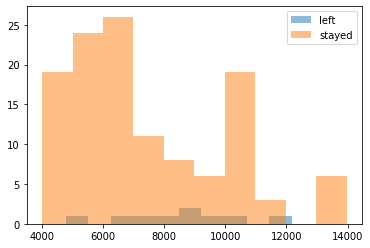

left: DescribeResult(nobs=9, minmax=(4777, 12169), mean=8548.222222222223, variance=4634457.944444445, skewness=-0.08383878253500085, kurtosis=-0.38144564998365604)
stayed: DescribeResult(nobs=122, minmax=(4000, 13966), mean=7453.55737704918, variance=6555980.347920336, skewness=0.7220146119443669, kurtosis=-0.2955160204339724)
ttest: Ttest_indResult(statistic=1.2491400710166531, pvalue=0.21387574040509666)
Manager monthly income


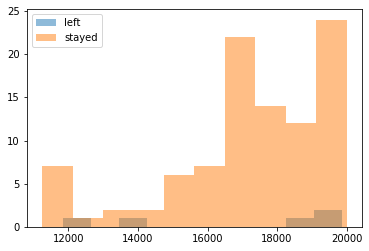

left: DescribeResult(nobs=5, minmax=(11849, 19859), mean=16797.4, variance=14353637.299999999, skewness=-0.4534675386869179, kurtosis=-1.6442823773865995)
stayed: DescribeResult(nobs=97, minmax=(11244, 19999), mean=17201.484536082473, variance=5042916.314862543, skewness=-1.0464304779487126, kurtosis=0.4857995373665345)
ttest: Ttest_indResult(statistic=-0.37864300929819, pvalue=0.7057556703550003)
Sales Representative monthly income


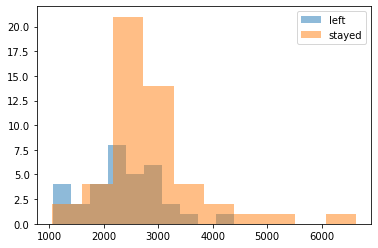

left: DescribeResult(nobs=33, minmax=(1081, 4400), mean=2364.7272727272725, variance=511478.20454545453, skewness=0.2744248080001025, kurtosis=0.608287456549689)
stayed: DescribeResult(nobs=50, minmax=(1052, 6632), mean=2798.44, variance=811673.6800000002, skewness=1.9838713789724596, kurtosis=6.230588644315052)
ttest: Ttest_indResult(statistic=-2.322811971735709, pvalue=0.022699054162586153)
Research Director monthly income


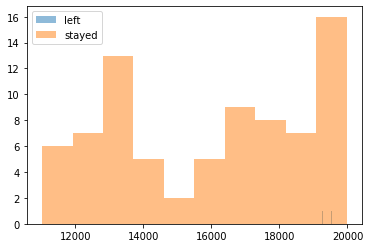

left: DescribeResult(nobs=2, minmax=(19246, 19545), mean=19395.5, variance=44700.5, skewness=0.0, kurtosis=-2.0)
stayed: DescribeResult(nobs=78, minmax=(11031, 19973), mean=15947.346153846154, variance=7901431.476023976, skewness=-0.1590312321026728, kurtosis=-1.390408084546213)
ttest: Ttest_indResult(statistic=1.723999106627868, pvalue=0.08866946264526153)
Human Resources monthly income


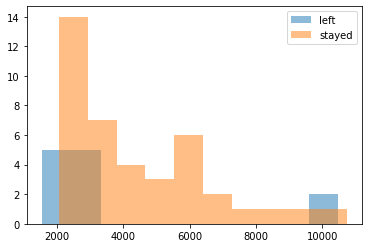

left: DescribeResult(nobs=12, minmax=(1555, 10482), mean=3715.75, variance=9387961.477272727, skewness=1.7264456899983434, kurtosis=1.1131697310535618)
stayed: DescribeResult(nobs=40, minmax=(2064, 10725), mean=4391.75, variance=5022091.679487179, skewness=1.0708424604858862, kurtosis=0.4978155519044849)
ttest: Ttest_indResult(statistic=-0.8396944356096652, pvalue=0.4050769087414341)


In [ ]:
for role in df['JobRole'].unique():
  check_for_diff(df_left[df_left['JobRole']==role], df_stayed[df_stayed['JobRole']==role], 'MonthlyIncome', 'MonthlyIncome', 'left', 'stayed', role + ' monthly income')

##5. Results

Based on visual inspection, the company-wide monthly income is questionably normal, but the skewness is well within range. The kurtosis is a little high but not overly so. Those who left had a mean income of \$4,800 and those who stayed had a mean income of \$6,800. The p-value of the hypothesis is < 0.001 and the 95% confidence interval is significant. In fact, the upper end of the confidence value of the difference, \$2,600, is over half of the mean of those who left, \$4,800. 

The per-role analyses don't change the picture significantly. Some of the roles had too few employees who left to draw any kind of conclusion. Specifically, the Manufacturing Director, Healthcare Representative, Manager, Research Director, and Human Resources roles all had very little attrition. The Research Director role only had two employees leave. This leaves four roles to review: Sales Executive, Research Scientist, Laboratory Technician, and Sales Representative. While visually they appear to have significant skew, the statistics indicate that the skewness is within an acceptable range. The kurtosis is also within limits though the Sales Representative's kurtosis is a bit high. They all have p-values below 0.05. However, using the Bonferroni adjustment to account for our examination of multiple hypothesis tests means we need a p-value 0f 0.05/4 = 0.0125 to ensure false positives are no more than 5% likely. At this level only the Research Scientist and Laboratory Technician roles shows a statistically significant difference in monthly income. 

However, the per-role analyses were only conducted to supplement our original hypothesis test; That of the company wide populations. The per-role analyses, even if they don't all provide signals strong enough to ensure they are statistically significant, are at least consistent with our main hypothesis. Given the strong results for the company-wide test, we can confidently reject the null hypothesis that there is no difference between the monthly income of employees who left and those who stayed. The two-tail 95% confidence interval for the difference between their incomes is \$1509 and \$2581. 

The point plots below help illustrate the differences in the total population and for the four roles with substantial attrition.

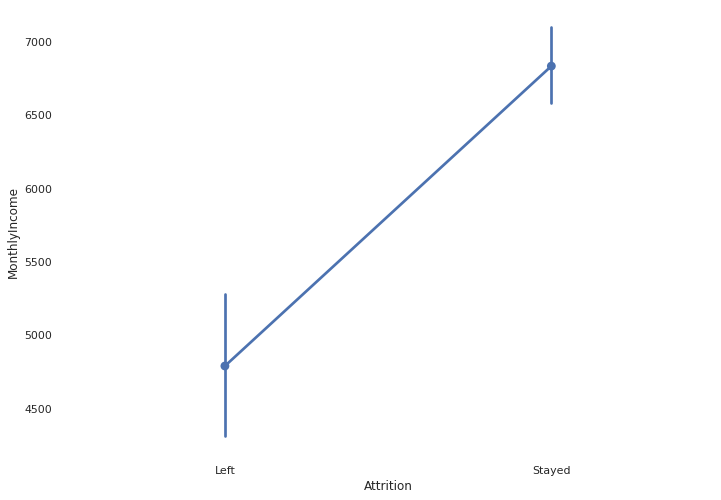

In [ ]:
seaborn.pointplot(x='Attrition', y='MonthlyIncome', data = df_combined)
seaborn.set(rc={'figure.figsize':(25,16), 'axes.facecolor':'white', 'figure.facecolor':'white'})

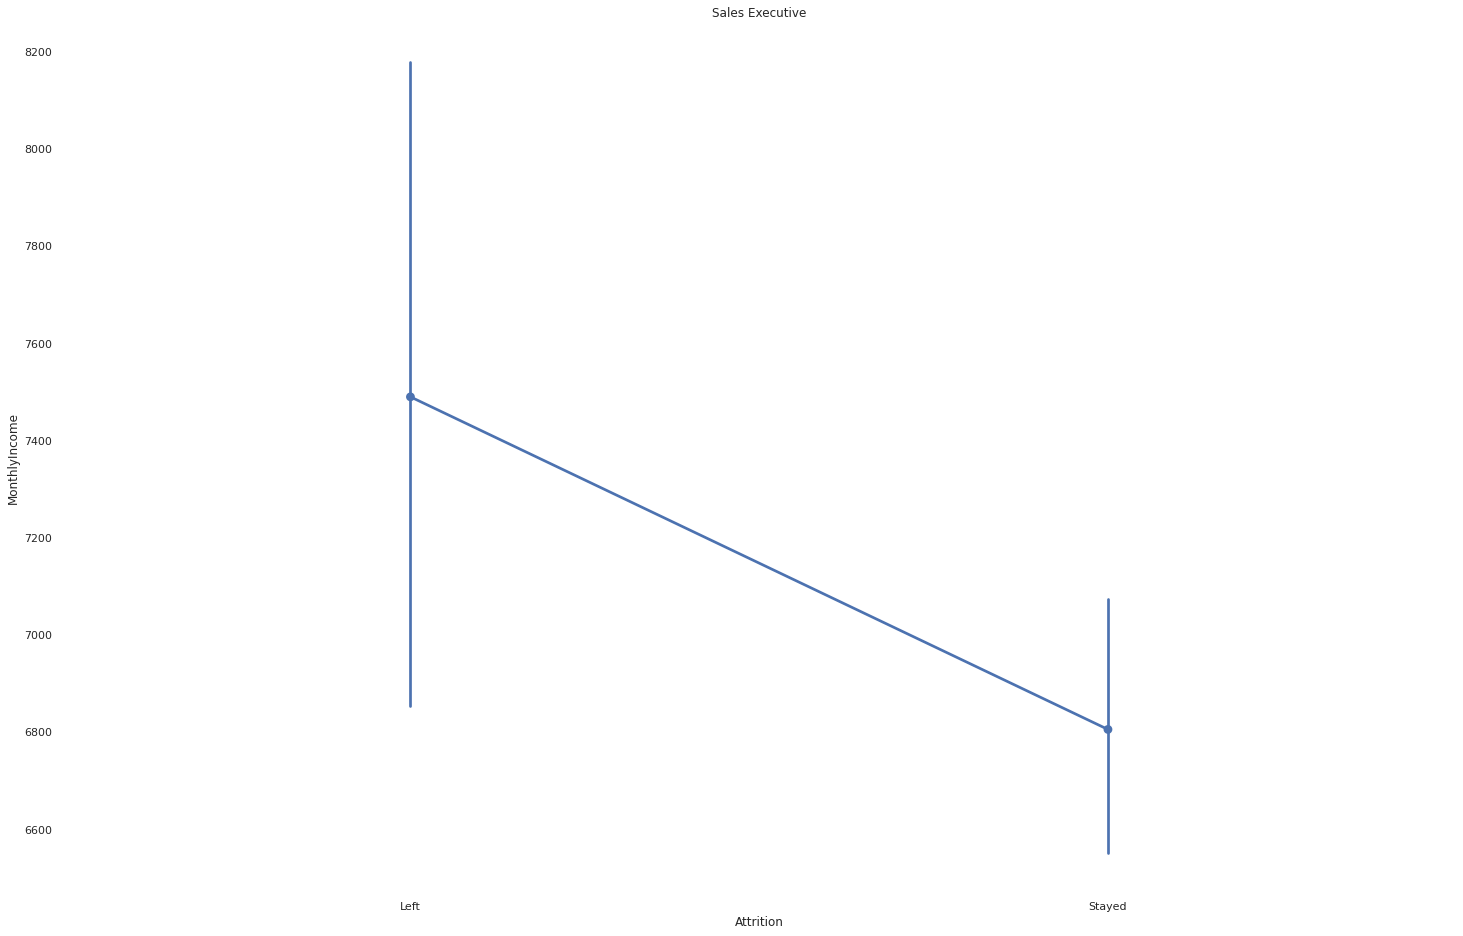

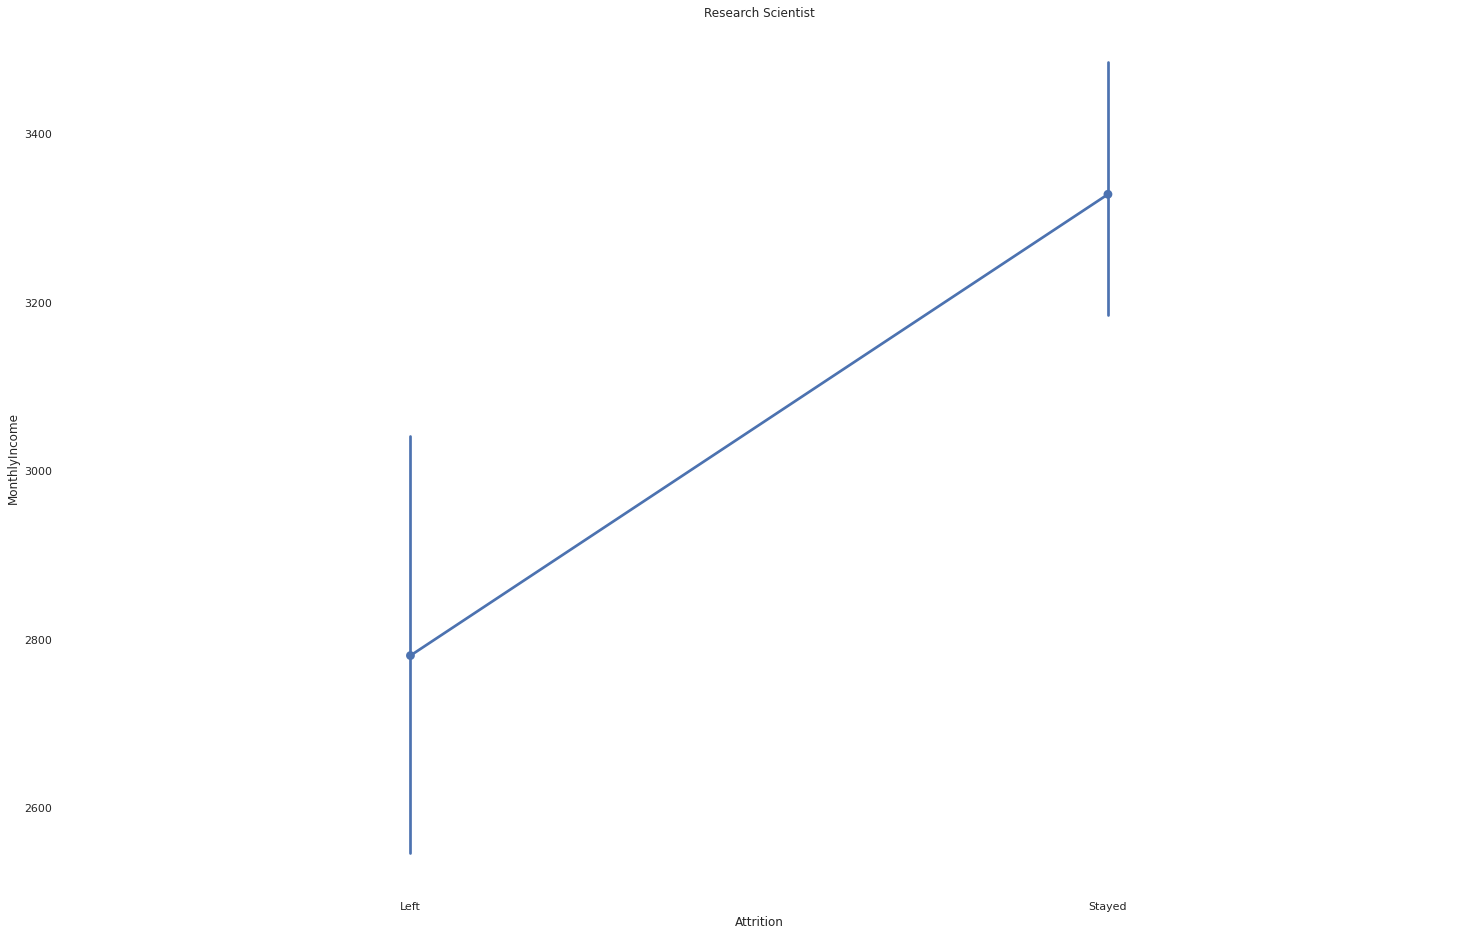

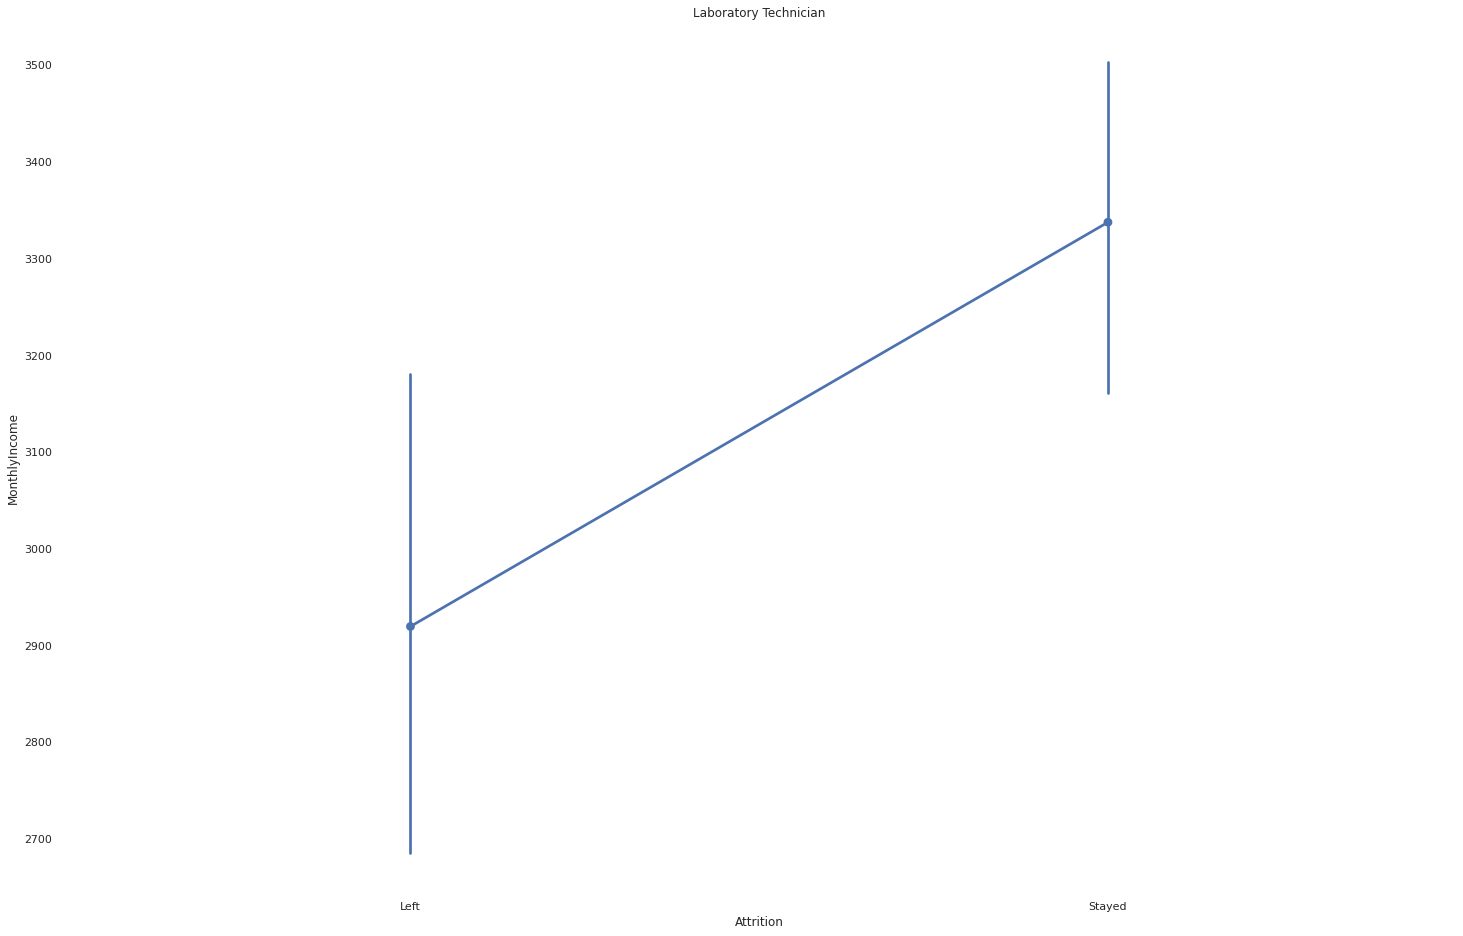

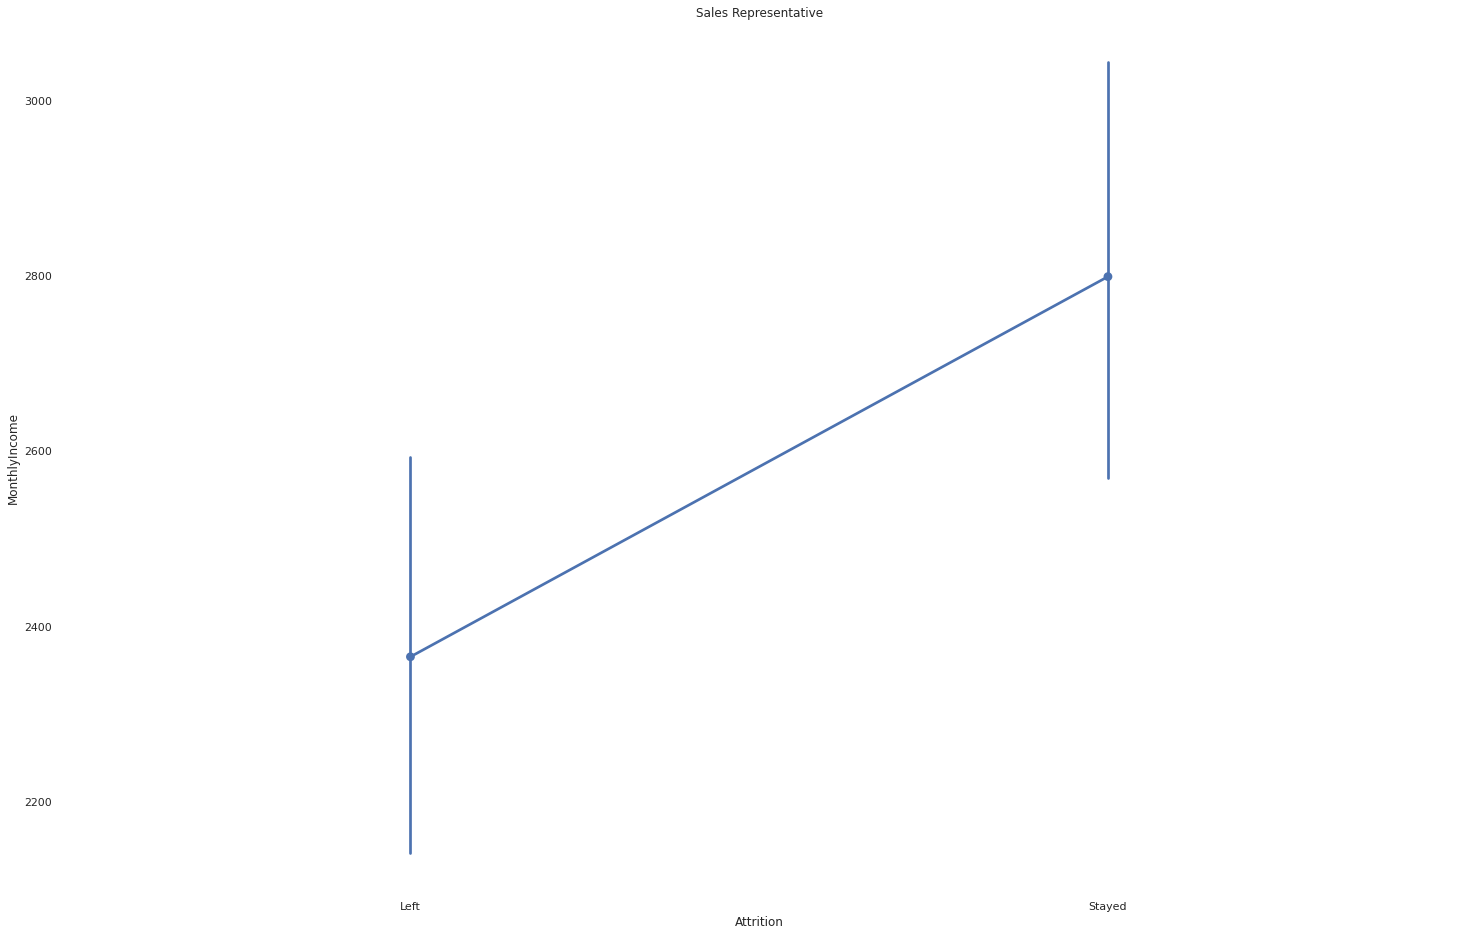

In [ ]:
def point_plot_role(role):
  df_combined = pd.DataFrame(columns=['Attrition', 'MonthlyIncome'])
  for row in df_left[df_left['JobRole']==role]['MonthlyIncome']:
    df_combined = df_combined.append({'Attrition' : 'Left', 'MonthlyIncome' : row}, ignore_index=True)
  for row in df_stayed[df_stayed['JobRole']==role]['MonthlyIncome']:
    df_combined = df_combined.append({'Attrition' : 'Stayed', 'MonthlyIncome' : row}, ignore_index=True)
  seaborn.pointplot(x='Attrition', y='MonthlyIncome', data = df_combined)
  plt.title(role)
  plt.show()

seaborn.set(rc={'figure.figsize':(25,16), 'axes.facecolor':'white', 'figure.facecolor':'white'})
point_plot_role('Sales Executive')
point_plot_role('Research Scientist')
point_plot_role('Laboratory Technician')
point_plot_role('Sales Representative')




##6. Discussion and recommendation

Since there is a significant difference in incomes for the employees leaving the company and those that stay, I recommend starting a project to investigate changes to employee compensation. The project would have three goals. The first is to confirm the results of this analysis. Suggestions for improving the inferential power of this dataset are listed below. In addition, the project should compare the costs of high turnover to the differences in income. Finally, the project should consider all the factors available from the data and not monthly income by itself. More sophisticated techniques should be used to tease out the impact of each factor. Only with these improvements can a decision to change the compensation policy be considered data-driven.

The dataset does not distinguish between people who were fired for cause, people who were downsized, and people who resigned. The employees that the company wants to retain are those who resign, not incompetent or unnecessary employees. Given that, the "attrition" field in the dataset should be replaced with "resigned." 

The time period over which the data applies should be defined. Presumably 186 out of 1,470 employees did not leave the company in a week. The attritions were more likely spread out over a year. Whatever the timeframe, it must be clearly defined.

It would be helpful to have data from exit interviews. Employees could be asked which of the 32 factors included in the data set were the most important in their decision to leave. While not perfect signals, that would presumably be a stronger signal than just looking at people's attributes alone.

Another possibility is that people who don't thrive at IBM have their incomes stagnate until they leave. Some measure of employee performance should be included. If a large contingent of non-thrivers is found, a project could be started to learn why some people don't thrive at IBM.

IBM is a multi-national company with employees in areas with dramatically different costs of living. If the scope of the project is larger than one IBM location, a feature including cost of living where the employee lives would be helpful.

Ideally the data would be tracked over time to sample across multiple economic and reputational trends. Perhaps people left because IBM doesn't respond aggresively enough to tight labor markets. Perhaps there were bad headlines about how Deep Blue never really worked out in hospitals and that pushed people out the door. Maybe the company revised its Paid Time Off policy or moved an office. Preferably the data would include these compounding factors. Comparing across years would bring its own difficulties though. The same employees would show up in multiple rows. They aren't really independent samples as they track the same person. Unusually loyal employees may stay no matter how you treat them. 

In conclusion, the strong results of this analysis demand additional research.